In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score, adjusted_mutual_info_score, homogeneity_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [3]:
data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


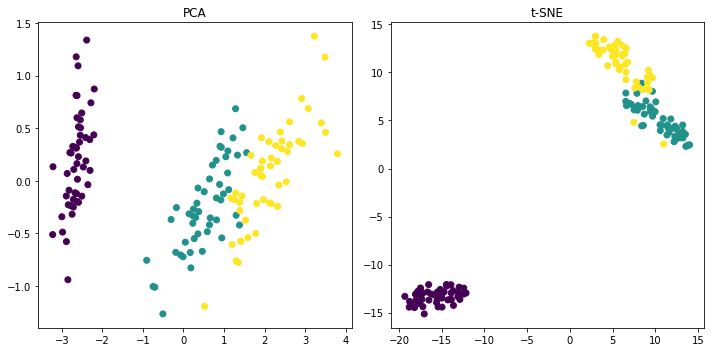

In [5]:
D1 = data[['petal length (cm)', 'petal width (cm)', 'sepal length (cm)', 'sepal width (cm)']]

# Снижение размерности с помощью PCA
pca = PCA(n_components=2)
D2_pca = pca.fit_transform(D1)

# Снижение размерности с помощью t-SNE
tsne = TSNE(n_components=2)
D3_tsne = tsne.fit_transform(D1)

# Визуализация точек датасетов D2 и D3
plt.figure(figsize=(10, 5))

# Визуализация точек датасета D2 (PCA)
plt.subplot(1, 2, 1)
plt.scatter(D2_pca[:, 0], D2_pca[:, 1], c=iris.target, cmap='viridis')
plt.title('PCA')

# Визуализация точек датасета D3 (t-SNE)
plt.subplot(1, 2, 2)
plt.scatter(D3_tsne[:, 0], D3_tsne[:, 1], c=iris.target, cmap='viridis')
plt.title('t-SNE')

plt.tight_layout()
plt.show()

# Кластеризация для D1
kmeans_D1 = KMeans(n_clusters=3).fit(D1)
agg_D1 = AgglomerativeClustering(n_clusters=3).fit(D1)
dbscan_D1 = DBSCAN(eps=0.5, min_samples=5).fit(D1)

# Кластеризация для D2 (PCA)
kmeans_D2 = KMeans(n_clusters=3).fit(D2_pca)
agg_D2 = AgglomerativeClustering(n_clusters=3).fit(D2_pca)
dbscan_D2 = DBSCAN(eps=0.5, min_samples=5).fit(D2_pca)

# Кластеризация для D3 (t-SNE)
kmeans_D3 = KMeans(n_clusters=3).fit(D3_tsne)
agg_D3 = AgglomerativeClustering(n_clusters=3).fit(D3_tsne)
dbscan_D3 = DBSCAN(eps=0.5, min_samples=5).fit(D3_tsne)

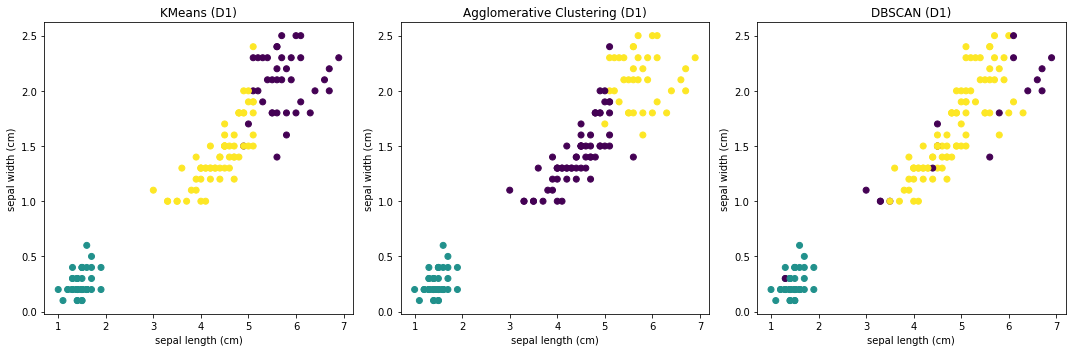

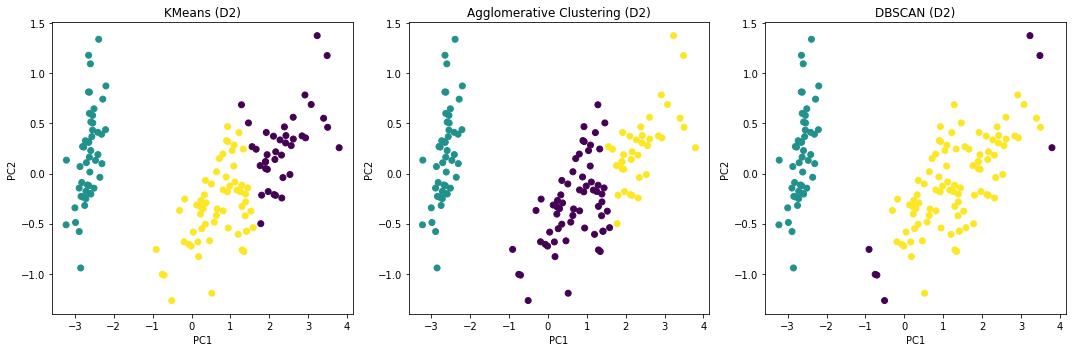

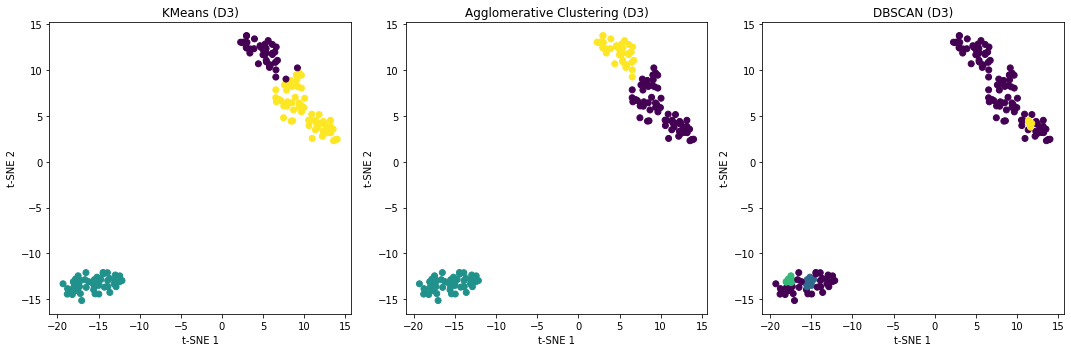

In [9]:
# Визуализация кластеризации для D1
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(D1.iloc[:, 0], D1.iloc[:, 1], c=kmeans_D1.labels_, cmap='viridis')
plt.title('KMeans (D1)')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.subplot(1, 3, 2)
plt.scatter(D1.iloc[:, 0], D1.iloc[:, 1], c=agg_D1.labels_, cmap='viridis')
plt.title('Agglomerative Clustering (D1)')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.subplot(1, 3, 3)
plt.scatter(D1.iloc[:, 0], D1.iloc[:, 1], c=dbscan_D1.labels_, cmap='viridis')
plt.title('DBSCAN (D1)')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.tight_layout()
plt.show()

# Визуализация кластеризации для D2 (PCA)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(D2_pca[:, 0], D2_pca[:, 1], c=kmeans_D2.labels_, cmap='viridis')
plt.title('KMeans (D2)')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(1, 3, 2)
plt.scatter(D2_pca[:, 0], D2_pca[:, 1], c=agg_D2.labels_, cmap='viridis')
plt.title('Agglomerative Clustering (D2)')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(1, 3, 3)
plt.scatter(D2_pca[:, 0], D2_pca[:, 1], c=dbscan_D2.labels_, cmap='viridis')
plt.title('DBSCAN (D2)')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.tight_layout()
plt.show()

# Визуализация кластеризации для D3 (t-SNE)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(D3_tsne[:, 0], D3_tsne[:, 1], c=kmeans_D3.labels_, cmap='viridis')
plt.title('KMeans (D3)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

plt.subplot(1, 3, 2)
plt.scatter(D3_tsne[:, 0], D3_tsne[:, 1], c=agg_D3.labels_, cmap='viridis')
plt.title('Agglomerative Clustering (D3)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

plt.subplot(1, 3, 3)
plt.scatter(D3_tsne[:, 0], D3_tsne[:, 1], c=dbscan_D3.labels_, cmap='viridis')
plt.title('DBSCAN (D3)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

plt.tight_layout()
plt.show()

Для ирисов лучше всего подходят методы кластеризации: KMeans (во всех случаях) и Agglomerative Clustering (во 2 и 3 случае). DBSCAN не подходит в данном случае ни для какого-либо датасета. Внешне.

In [8]:
print("Метрики D1:")
print("KMeans:")
print("Оценка силуэта:", silhouette_score(D1, kmeans_D1.labels_))
print("ARI:", adjusted_rand_score(iris.target, kmeans_D1.labels_))
print("AMI:", adjusted_mutual_info_score(iris.target, kmeans_D1.labels_))
print("Однородность:", homogeneity_score(iris.target, kmeans_D1.labels_))

print("\nАгломеративная кластеризация:")
print("Оценка силуэта:", silhouette_score(D1, agg_D1.labels_))
print("ARI:", adjusted_rand_score(iris.target, agg_D1.labels_))
print("AMI:", adjusted_mutual_info_score(iris.target, agg_D1.labels_))
print("Однородность:", homogeneity_score(iris.target, agg_D1.labels_))

print("\nDBSCAN:")
print("Оценка силуэта:", silhouette_score(D1, dbscan_D1.labels_))
print("ARI:", adjusted_rand_score(iris.target, dbscan_D1.labels_))
print("AMI:", adjusted_mutual_info_score(iris.target, dbscan_D1.labels_))
print("Однородность:", homogeneity_score(iris.target, dbscan_D1.labels_))

# Оценка качества кластеризации для D2 (PCA)
print("\nМетрики D2 (PCA):")
print("KMeans:")
print("Оценка силуэта:", silhouette_score(D2_pca, kmeans_D2.labels_))
print("ARI:", adjusted_rand_score(iris.target, kmeans_D2.labels_))
print("AMI:", adjusted_mutual_info_score(iris.target, kmeans_D2.labels_))
print("Однородность:", homogeneity_score(iris.target, kmeans_D2.labels_))

print("\nАгломеративная кластеризация:")
print("Оценка силуэта:", silhouette_score(D2_pca, agg_D2.labels_))
print("ARI:", adjusted_rand_score(iris.target, agg_D2.labels_))
print("AMI:", adjusted_mutual_info_score(iris.target, agg_D2.labels_))
print("Однородность:", homogeneity_score(iris.target, agg_D2.labels_))

print("\nDBSCAN:")
print("Оценка силуэта:", silhouette_score(D2_pca, dbscan_D2.labels_))
print("ARI:", adjusted_rand_score(iris.target, dbscan_D2.labels_))
print("AMI:", adjusted_mutual_info_score(iris.target, dbscan_D2.labels_))
print("Однородность:", homogeneity_score(iris.target, dbscan_D2.labels_))

# Оценка качества кластеризации для D3 (t-SNE)
print("\nМетрики D3 (t-SNE):")
print("KMeans:")
print("Оценка силуэта:", silhouette_score(D3_tsne, kmeans_D3.labels_))
print("ARI:", adjusted_rand_score(iris.target, kmeans_D3.labels_))
print("AMI:", adjusted_mutual_info_score(iris.target, kmeans_D3.labels_))
print("Однородность:", homogeneity_score(iris.target, kmeans_D3.labels_))

print("\nАгломеративная кластеризация:")
print("Оценка силуэта:", silhouette_score(D3_tsne, agg_D3.labels_))
print("ARI:", adjusted_rand_score(iris.target, agg_D3.labels_))
print("AMI:", adjusted_mutual_info_score(iris.target, agg_D3.labels_))
print("Однородность:", homogeneity_score(iris.target, agg_D3.labels_))

print("\nDBSCAN:")
print("Оценка силуэта:", silhouette_score(D3_tsne, dbscan_D3.labels_))
print("ARI:", adjusted_rand_score(iris.target, dbscan_D3.labels_))
print("AMI:", adjusted_mutual_info_score(iris.target, dbscan_D3.labels_))
print("Однородность:", homogeneity_score(iris.target, dbscan_D3.labels_))


Метрики D1:
KMeans:
Оценка силуэта: 0.5528190123564097
ARI: 0.7302382722834697
AMI: 0.7551191675800483
Однородность: 0.7514854021988338

Агломеративная кластеризация:
Оценка силуэта: 0.554323661129642
ARI: 0.7311985567707746
AMI: 0.7671669615713113
Однородность: 0.7608008469718723

DBSCAN:
Оценка силуэта: 0.48603419703456857
ARI: 0.5206185241703302
AMI: 0.5989947874137123
Однородность: 0.5599460100861128

Метрики D2 (PCA):
KMeans:
Оценка силуэта: 0.597676421954799
ARI: 0.7163421126838476
AMI: 0.7386548254402864
Однородность: 0.736419288125285

Агломеративная кластеризация:
Оценка силуэта: 0.598475035370544
ARI: 0.7445264308738749
AMI: 0.7748480056872078
Однородность: 0.7695955651465263

DBSCAN:
Оценка силуэта: 0.5838022626417434
ARI: 0.551005126016069
AMI: 0.663950586354565
Однородность: 0.5798477237059092

Метрики D3 (t-SNE):
KMeans:
Оценка силуэта: 0.6854816
ARI: 0.7880443567941547
AMI: 0.8201591171645576
Однородность: 0.8151467864314353

Агломеративная кластеризация:
Оценка силуэта: